1. MLP Classifier for MNIST Handwritten Digits

In [27]:
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [28]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28 * 28)
    x_test = x_test.reshape(-1, 28 * 28)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [29]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
def train(model, x_train, y_train):
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=20,
        validation_split=0.2,
        verbose=1
    )
    return history

In [31]:
def evaluate_model_with_metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)  
    y_true = y_test.argmax(axis=1)         

    cm = confusion_matrix(y_true, y_pred_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_true, y_pred_classes))

In [32]:
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [ ]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()
history = train(model, x_train, y_train)

Epoch 1/20


c:\Users\kanih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7991 - loss: 0.6336 - val_accuracy: 0.9627 - val_loss: 0.1229
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9589 - loss: 0.1366 - val_accuracy: 0.9687 - val_loss: 0.1047
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9716 - loss: 0.0923 - val_accuracy: 0.9728 - val_loss: 0.0905
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9769 - loss: 0.0759 - val_accuracy: 0.9762 - val_loss: 0.0847
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9807 - loss: 0.0642 - val_accuracy: 0.9778 - val_loss: 0.0826
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9860 - loss: 0.0487 - val_accuracy: 0.9767 - val_loss: 0.0827
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9871 - loss: 0.0408 - val_accuracy: 0.9785 - val_loss: 0.0836
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9866 - loss: 0.0401 - val_accuracy: 0.9758

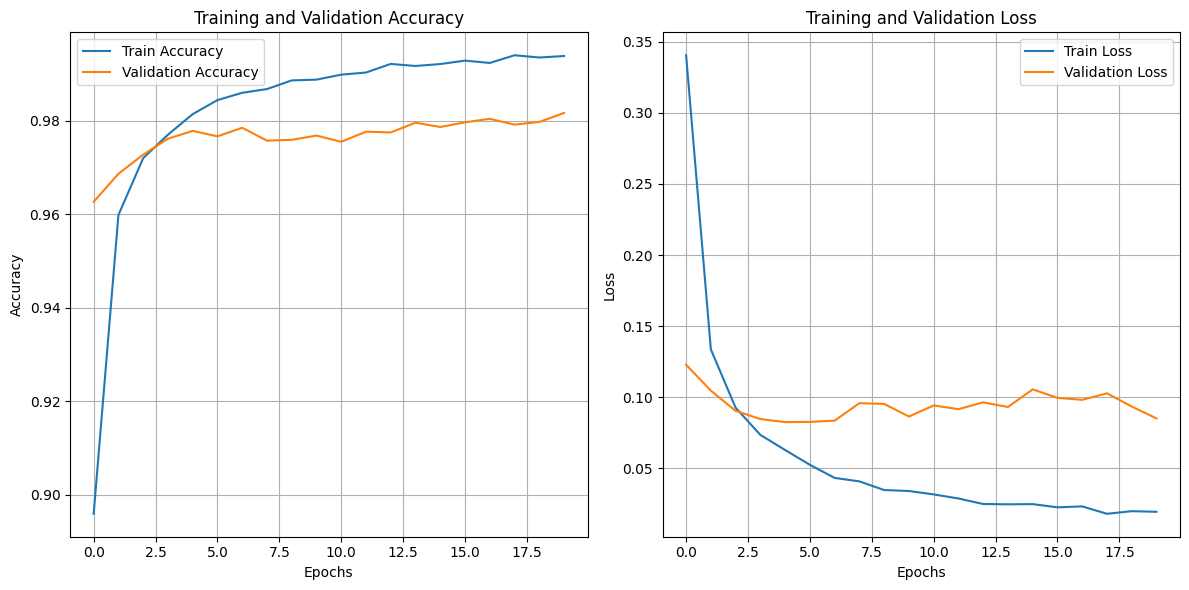

In [36]:
plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


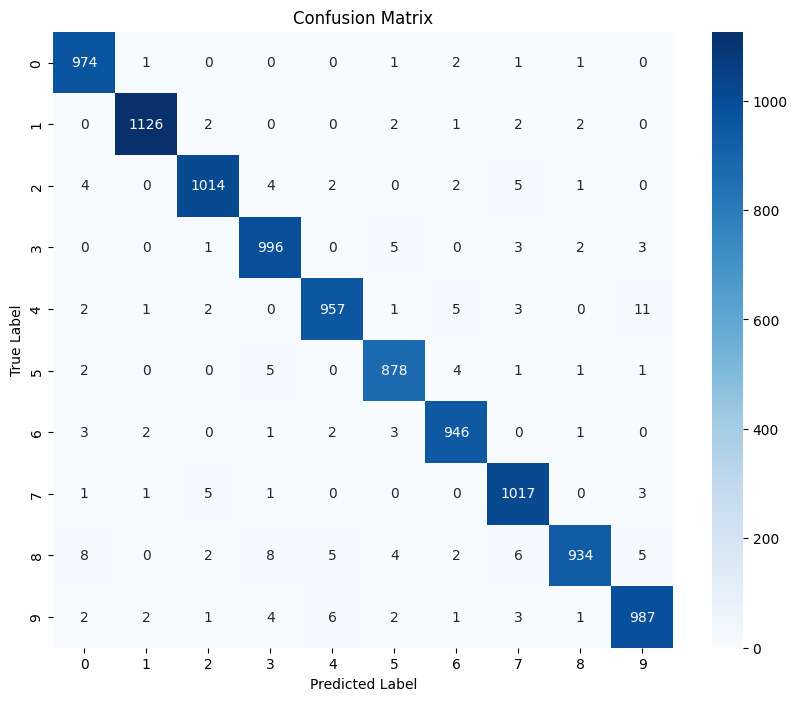

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [37]:

y_pred = model.predict(x_test)
evaluate_model_with_metrics(model, x_test, y_test)